In [30]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=3)

In [31]:
print("x shape")
print(f"train: {x_train.shape}, val: {x_val.shape}, test: {x_test.shape}")
print("y shape")
print(f"train: {y_train.shape}, val: {y_val.shape}, test: {y_test.shape}")

x shape
train: (48000, 28, 28), val: (12000, 28, 28), test: (10000, 28, 28)
y shape
train: (48000,), val: (12000,), test: (10000,)


In [32]:
class MLP(tf.keras.Model):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = tf.keras.layers.Flatten(input_shape=(28, 28))
        self.linear = tf.keras.layers.Dense(10, activation='softmax')

    def call(self, x):
        x = self.flatten(x)
        x = self.linear(x)
        return x

model = MLP()

In [33]:
# loss function
loss = tf.keras.losses.SparseCategoricalCrossentropy()

# optimizer 
lr = 0.005
optimizer = tf.keras.optimizers.Adam()

# metrics
metrics = tf.keras.metrics.SparseCategoricalAccuracy()

In [34]:
# compile
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=[metrics])

In [35]:
epochs = 30
batch_size = 128
result = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_val, y_val))

In [36]:
eval_result = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2645 - sparse_categorical_accuracy: 0.9256


In [37]:
train_acc = result.history['sparse_categorical_accuracy']
train_loss = result.history['loss']
val_acc = result.history['val_sparse_categorical_accuracy']
val_loss = result.history['val_loss']

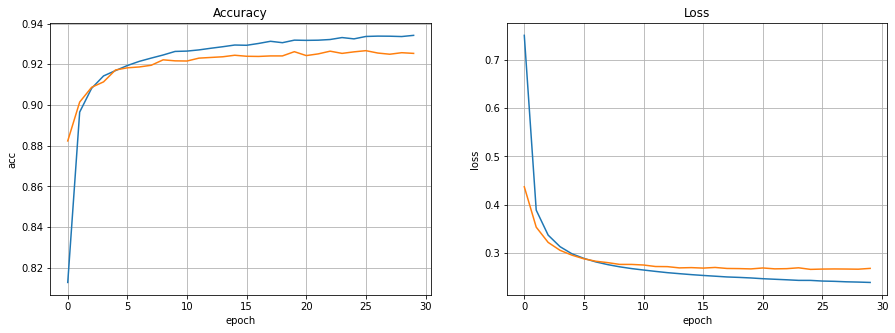

In [38]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Accuracy')
ax1.set_xlabel('epoch')
ax1.set_ylabel('acc')
ax1.grid()
ax1.plot(train_acc)
ax1.plot(val_acc)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Loss")
ax2.set_xlabel('epoch')
ax2.set_ylabel('loss')
ax2.grid()
ax2.plot(train_loss)
ax2.plot(val_loss)